# Hamiltonian Monte Carlo (HMC) Exercise
 >__Created__:  2018 Harrison B. Prosper

See hmc.ipynb for details of the Hamiltonian Monte Carlo method.

## Exercise
Sample from a 1-D function $f(q)$ using HMC.

In [1]:
import os, sys
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# update fonts
FONTSIZE = 24
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 24}

mp.rc('font', **font)

### Function from which to sample

In [3]:
def function(q):
    p = 0.5*st.norm.pdf(q, 2.0, 0.7)+0.3*st.norm.pdf(q, 3.0, 0.2)+ 0.2*st.norm.pdf(q, 5.0, 0.5)
    return p

def U(q):
    return -np.log(function(q)+1e-25)

In [4]:
def grad(U, q, h=1.e-4):
    return 0.5*(U(q+h)-U(q-h))/h

### Plot it

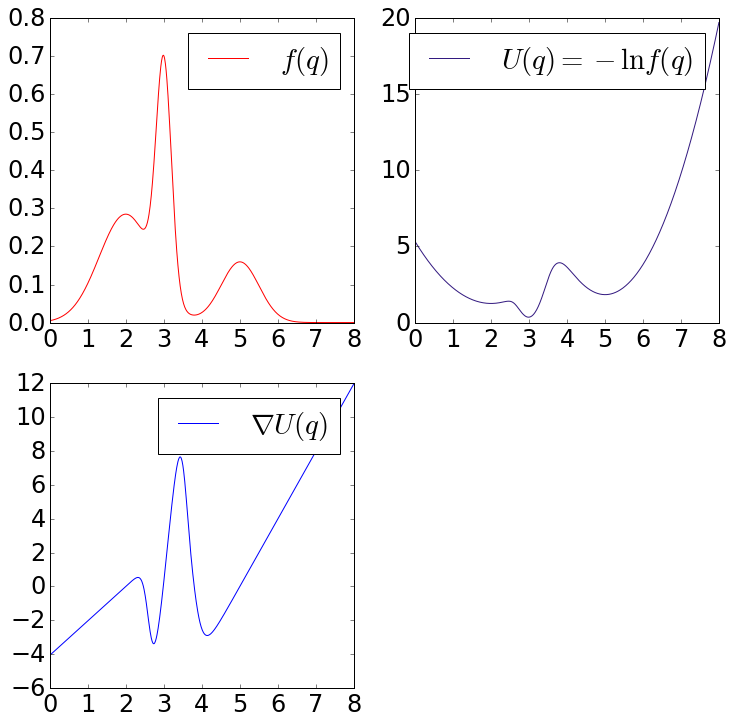

In [5]:
q = np.arange(0, 8, 0.01)
f = function(q)
u = U(q)
g = grad(U, q)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221); ax1.plot(q, f, color=(1,0,0), label=r'$f(q)$')
plt.legend()

ax2 = fig.add_subplot(222); ax2.plot(q, u, color=(0.2,0.1,0.5), label=r'$U(q) = -\ln f(q)$'); 
plt.legend()

ax3 = fig.add_subplot(223); ax3.plot(q, g, color=(0,0,1), label = r'$\mathbf{\nabla}U(q)$')
plt.legend()

plt.show()


### Run HMC

In [35]:
%run hmc.ipynb
NITER  = 1000  # number of iterations
BURNIN = 400
x = []
q0= 1.0   # initial position
a = 0.0   # number of accepted moves
f = 0.0
def runHMC(N, x, q0, epsilon=0.2, L=250, sigma=1.0):
    a = 0.0
    for i in range(N):
        q, accept = next_point(U, q0, epsilon, L, sigma)
        if accept:
            x.append(q)
            a += 1.0
            f = a / (i+1)
        if i % 100 == 0: 
            print "iteration: %10d, accepted fraction: %10.3f\t%10.2f" % (i, f, q)
        q0 = q
    return q

In [36]:
q = runHMC(NITER, x, q0)
joblib.dump(x, "hmc_%5.5d.pkl" % NITER)

iteration:          0, accepted fraction:      1.000	      1.11
iteration:        100, accepted fraction:      0.950	      5.15
iteration:        200, accepted fraction:      0.940	      2.52
iteration:        300, accepted fraction:      0.950	      4.10
iteration:        400, accepted fraction:      0.958	      5.66
iteration:        500, accepted fraction:      0.958	      3.95
iteration:        600, accepted fraction:      0.963	      1.97
iteration:        700, accepted fraction:      0.969	      3.02
iteration:        800, accepted fraction:      0.966	      3.44
iteration:        900, accepted fraction:      0.968	      2.99


['hmc_01000.pkl']

In [44]:
def plotDistribution(g, f, ftsize=FONTSIZE, fgsize=(12, 6)):
    # set size of figure
    plt.figure(figsize=fgsize)
    
    # plot signals probs.
    y, q, a = plt.hist(g, 
             bins=40, 
             color=(1,0,0),
             alpha=0.3,
             range=(0.0,8.0), 
             normed=True, 
             label=r'HMC')
    pl.legend() # show legend using specified "label"
    
    # add error bars
    h     = 0.5*(q[1]-q[0])
    gsum  = sum(g)
    area  = gsum * h
    yerr  = np.sqrt(y)/np.sqrt(area)
    q     = q + h; q = q[:-1]
    plt.errorbar(q, y, yerr=yerr, fmt='o')

    x = np.arange(0, 8, 0.01)
    y = f(x)
    plt.plot(x, y, label='$f(q)$', line_width=3)
    pl.legend()
    
    # adjust y limits
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    delta = 0.2
    ii = int(1.3*ymax/delta)
    ymax = ii * 0.2
    axes.set_ylim((0, ymax))
    plt.savefig("03_hmc.png")
    plt.show()

AttributeError: Unknown property line_width

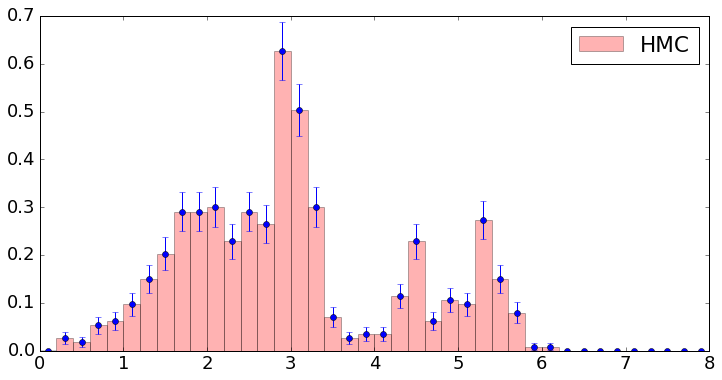

In [45]:
# update fonts
FONTSIZE = 18
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

mp.rc('font', **font)
plotDistribution(x[BURNIN:], function)